<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/Report9_LinearRegression_%EA%B0%95%EB%8F%99%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실습 9. 당뇨병 예측을 위한 선형회귀 분석**

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

In [ ]:
print(diabetes.data.shape)

(442, 10)


In [ ]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
# 최소제곱법을 사용한 선형회귀로 예측함수(선형함수) 추정
lr = LinearRegression().fit(X_train, y_train)  

#추정된 예측함수의 계수, 절편 확인
w = lr.coef_       #계수
b = lr.intercept_  #절편
print("w (lr.coef_):", w)
print("b (lr.intercept_):",b )

#추정된 예측함수를 이용하여 성능 확인
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

w (lr.coef_): [  71.45895983 -204.79757519  532.14826244  244.78350496 -202.56682471
  -52.44552843 -148.69416198  149.40531123  506.70839795  120.45920948]
b (lr.intercept_): 149.1324425990584
훈련 세트 점수: 0.52
테스트 세트 점수: 0.46


위 train set과 test set score 차이가 없다?
--> 크게 입력 데이터에 대하여 overfitting 되어있지않다

**다중 선형회귀**

In [ ]:
from sklearn.linear_model import Ridge

X = diabetes.data
y = diabetes.target

  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)

lr = LinearRegression().fit(X_train, y_train) #LinearRegression

w = lr.coef_       #계수
b = lr.intercept_  #절편
print("w (lr.coef_):", w)
print("b (lr.intercept_):",b )

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))


ridge = Ridge().fit(X_train, y_train)  #Ridge Regression (alpha=1)

w = ridge.coef_       #계수
b = ridge.intercept_  #절편
print("--------------------------")
print(" Ridge (alpha=1)")
print("w (ridge.coef_):", w)
print("b (ridge.intercept_):",b )

print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)  #Ridge Regression (alpha=10)

w = ridge10.coef_       #계수
b = ridge10.intercept_  #절편
print("--------------------------")
print(" Ridge (alpha=10)")
print("w (ridge10.coef_):", w)
print("b (ridge10.intercept_):",b )
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.01).fit(X_train, y_train)  #Ridge Regression (alpha=0.1)
w = ridge01.coef_       #계수
b = ridge01.intercept_  #절편
print("--------------------------")
print(" Ridge (alpha=0.1)")
print("w (ridge01.coef_):", w)
print("b (ridge01.intercept_):",b )

print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

(331, 10)
(111, 10)
w (lr.coef_): [ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354]
b (lr.intercept_): 153.06798218266258
훈련 세트 점수: 0.56
테스트 세트 점수: 0.36
--------------------------
 Ridge (alpha=1)
w (ridge.coef_): [  21.19927911  -60.47711393  302.87575204  179.41206395    8.90911449
  -28.8080548  -149.30722541  112.67185758  250.53760873   99.57749017]
b (ridge.intercept_): 152.4477761489962
훈련 세트 점수: 0.46
테스트 세트 점수: 0.36
--------------------------
 Ridge (alpha=10)
w (ridge10.coef_): [ 16.17060747   0.82949183  66.1908676   45.36791724  17.0565142
  11.36660566 -41.53254055  41.38060887  60.44422047  37.39215781]
b (ridge10.intercept_): 152.04445116047046
훈련 세트 점수: 0.17
테스트 세트 점수: 0.14
--------------------------
 Ridge (alpha=0.1)
w (ridge01.coef_): [ -39.10301115 -203.435885    592.25342919  297.25810373 -252.42469968
   20.90559566 -145.19575989   97.03282049  580.07806371   32.94492155]
b

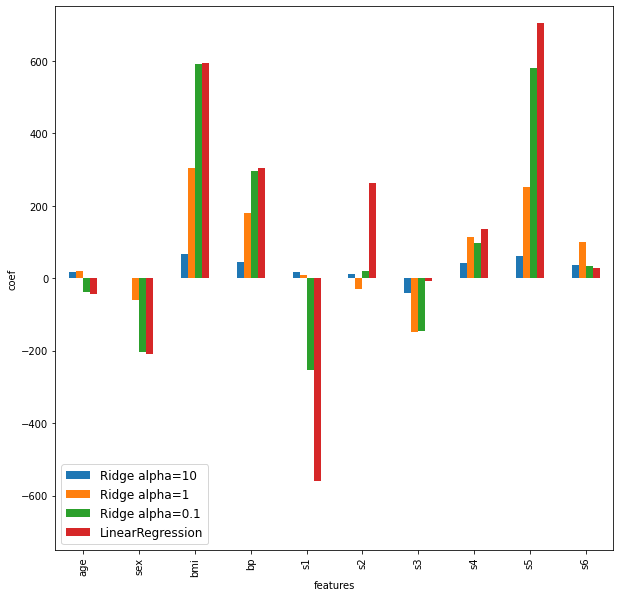

In [ ]:
#alpha 값에 따른 계수 비교
ind =  diabetes.feature_names
dfe = pd.DataFrame({'Ridge alpha=10': ridge10.coef_, 
                   'Ridge alpha=1': ridge.coef_, 
                   'Ridge alpha=0.1': ridge01.coef_, 
                   'LinearRegression': lr.coef_}, index =ind)

dfe.plot.bar(figsize=(10,10))
plt.xlabel("features")
plt.ylabel("coef")
plt.ylim(-750, 750)
plt.legend(fontsize=12)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6   MEDV  
0 -0.002592  0.019908 -0.017646  151.0  
1 -0.039493 -0.068330 -0.092204   75.0  
2 -0.002592  0.002864 -0.025930  141.0  
3  0.034309  0.022692 -0.009362  206.0  
4 -0.002592 -0.031991 -0.046641  135.0  
        sex       bmi        bp        s1        s3        s5   MEDV
0  0.050680  0.061696  0.021872 -0.044223 -0.043401  0.019908  151.0
1 -0.044642 -0.051474 -0.026328 -0.008449  0.074412 -0.068330   75.0
2  0.050680  0.044451 -0.005671 -0.045599 -0.032356  0.002864  141.0
3 -0.044642 -0.011595 -0.03

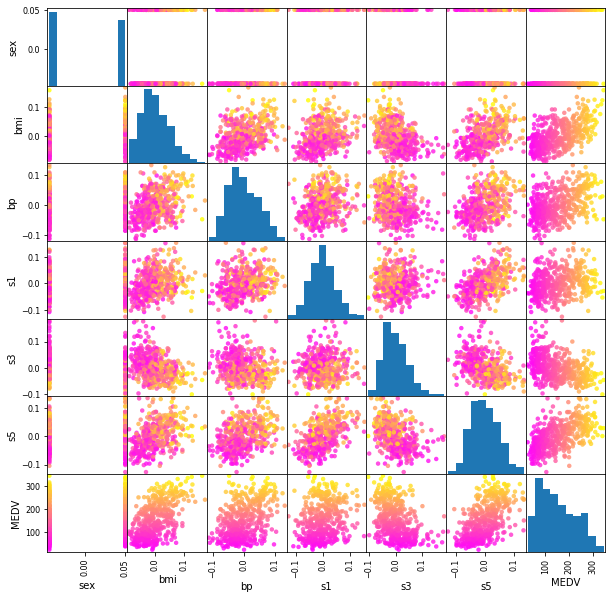

features 6 :  SEX,BMI,BP,s1,s3,s5
w (lr.coef_): [-219.41502652  556.19535787  385.38187218 -171.60511423 -294.96309519
  482.17336456]
b (lr.intercept_): 151.69684172437996
훈련 세트 점수: 0.51
테스트 세트 점수: 0.49


In [ ]:
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['MEDV'] = diabetes.target
print(df.head())

df6=df.loc[:,['sex','bmi','bp','s1', 's3','s5','MEDV']]

print(df6.head())
#scatter matrix
pd.plotting.scatter_matrix(df6, c=df6['MEDV'],marker='o',alpha=.8, s=20, cmap='spring', figsize = (10,10))
plt.show()


X6=df6.drop(['MEDV'], axis = 1)
y=df['MEDV']
         
X_train, X_test, y_train, y_test = train_test_split(X6, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)  #선형회귀(최소제곱법)로 예측함수 추정

w = lr.coef_       #계수
b = lr.intercept_  #절편
print("features 6 :  SEX,BMI,BP,s1,s3,s5")
print("w (lr.coef_):", w)
print("b (lr.intercept_):",b )

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
